### モジュールのインポート

In [1]:
import numpy as np
import pickle
import MeCab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### サンプルデータの読み込み

In [2]:
with open('Sample_Data.pickle','rb') as f:
    labels,texts = pickle.load(f)

### 形態素解析の辞書，word2vecモデルの読み込み

In [3]:
#辞書
dic_path="dic/mecab-ipadic-neologd-0.0.5"
tagger = MeCab.Tagger("-Ochasen -d {0}".format(dic_path))
# word2vecのモデル
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('word2vec/entity_vector.model.txt')

### CNNによる学習

In [4]:
import CNN_text
CNN_classifier = CNN_text.CNN(tagger=tagger,model=model,filter_sizes=[3,4,5],n_epochs=100)

Using TensorFlow backend.


In [5]:
CNN_classifier.fit(labels=labels,texts=texts)

学習開始
EPOCH:1
 epoch 20, loss 3.10911, acc 0.296
EPOCH:2
 epoch 40, loss 2.43709, acc 0.3405
EPOCH:3
 epoch 60, loss 2.34446, acc 0.366
EPOCH:4
 epoch 80, loss 2.20201, acc 0.358
EPOCH:5
 epoch 100, loss 2.05015, acc 0.354
EPOCH:6
 epoch 120, loss 2.05269, acc 0.352
EPOCH:7
 epoch 140, loss 1.83639, acc 0.374
EPOCH:8
 epoch 160, loss 1.84787, acc 0.3695
EPOCH:9
 epoch 180, loss 1.70274, acc 0.359
EPOCH:10
 epoch 200, loss 1.70512, acc 0.351
EPOCH:11
 epoch 220, loss 1.63803, acc 0.3675
EPOCH:12


KeyboardInterrupt: 

### 正解率とConfusionMatrix

正解率：0.37400001287460327


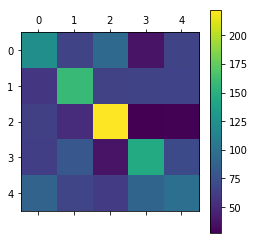

In [6]:
Results = CNN_classifier.Results

print('正解率：{}'.format(max(Results['Accuracy'].values)))
CMX = pd.DataFrame(Results.loc[Results['Accuracy'].argmax(),'confusion_matrix'])
plt.matshow(CMX)
plt.colorbar()

### 学習したモデルを用いてラベル未知のユーザの推定

In [7]:
predictions, probabilities = CNN_classifier.predict(texts=texts[:10])

In [8]:
predictions

array([4, 4, 0, 0, 0, 4, 0, 4, 0, 2])

In [9]:
probabilities

array([[ 0.30280286,  0.32249361,  0.02550345,  0.0020691 ,  0.34713098],
       [ 0.19488704,  0.10640774,  0.0140672 ,  0.01408962,  0.67054844],
       [ 0.72343582,  0.07433448,  0.02047746,  0.00947954,  0.1722727 ],
       [ 0.51212877,  0.06191864,  0.07782484,  0.06771238,  0.28041539],
       [ 0.70866984,  0.08752999,  0.06110206,  0.00276012,  0.13993798],
       [ 0.25371915,  0.04967014,  0.08166874,  0.06735845,  0.54758352],
       [ 0.46453404,  0.04992387,  0.07146781,  0.07101817,  0.34305614],
       [ 0.24261799,  0.02212467,  0.1964123 ,  0.03272636,  0.50611866],
       [ 0.43689579,  0.14932987,  0.16234143,  0.00347432,  0.24795859],
       [ 0.27079171,  0.12032019,  0.28783903,  0.07358279,  0.24746631]], dtype=float32)